# Data exploration

In [90]:
# imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
from utils.load import load_my_data

In [92]:
# Load data
train_data, train_labels, test_data = load_my_data()

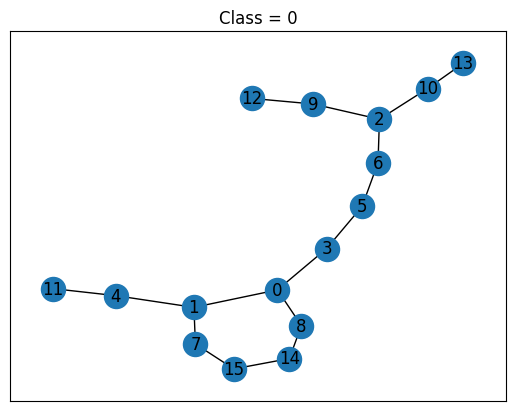

In [4]:
G = train_data[0]
label = train_labels[0]
pos = nx.spring_layout(G)
plt.figure()
nx.draw_networkx(G, pos=pos)
_ = plt.title(f"Class = {label}")

In [5]:
G.nodes[0]['labels'][0]

1

In [6]:
# Node fields
G.nodes[0]
print(f"Number of nodes labels in training set {len(np.unique(np.concatenate([[G.nodes[k]['labels'][0] for k in G.nodes] for G in train_data])))}")

Number of nodes labels in training set 47


In [7]:
# Edge fields
print("Number of edges lables in training set", len(np.unique(np.concatenate([[G.edges[ed[0], ed[1]]['labels'][0] for ed in G.edges] for G in train_data]))) )

Number of edges lables in training set 4


In [8]:
# Labels repartion
np.bincount(train_labels)

array([5445,  555])

In [9]:
G1 = train_data[0]
G2 = train_data[1]
G = nx.tensor_product(G1,G2)
len(G.nodes)

384

In [10]:
new_nodes = []
for node in G.nodes:
    if G.nodes[node]['labels'][0] == G.nodes[node]['labels'][1]:
        new_nodes.append(node)
new_G = nx.subgraph(G, new_nodes)

In [11]:
len(new_G.nodes)

263

In [12]:
A = nx.adjacency_matrix(G)


/tmp/ipykernel_31485/1657464979.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [13]:
sys.path.append('./utils')
from utils.walk_on_graph import nth_order_walk_kernel
from utils.kernel_utils import compute_kernel_on_dataset, centered_gram_matrix
from utils.kernel_pca import kernel_pca

In [79]:
nth_order_walk_kernel(G1,G2)

/home/pl/kaggle_data_challenge/utils/walk_on_graph.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


array([194610])

In [60]:
dataset = train_data[:100]

In [65]:
K = compute_kernel_on_dataset(dataset, nth_order_walk_kernel, kernel_kwargs={"n": 5})

Evaluating kernel on 100 graph: 100%|██████████| 100/100 [01:04<00:00,  1.56Graph/s]


In [195]:
K_centered = centered_gram_matrix(K)

In [196]:
n_components = 3
components = kernel_pca(K, n_components=n_components)

0.0


In [197]:
components[:,0] @ K_centered @ components[:,2]

1.1102230246251565e-16

In [198]:
var = [components[:,i].T @ (np.linalg.matrix_power(K_centered,2)) @ components[:,i] / 100 for i in range(n_components)]
var

[13616.715409491811, 743.5322542333623, 468.9485778298196]

In [199]:
components[:,0].T @ K_centered @ components[:,0]

1.0

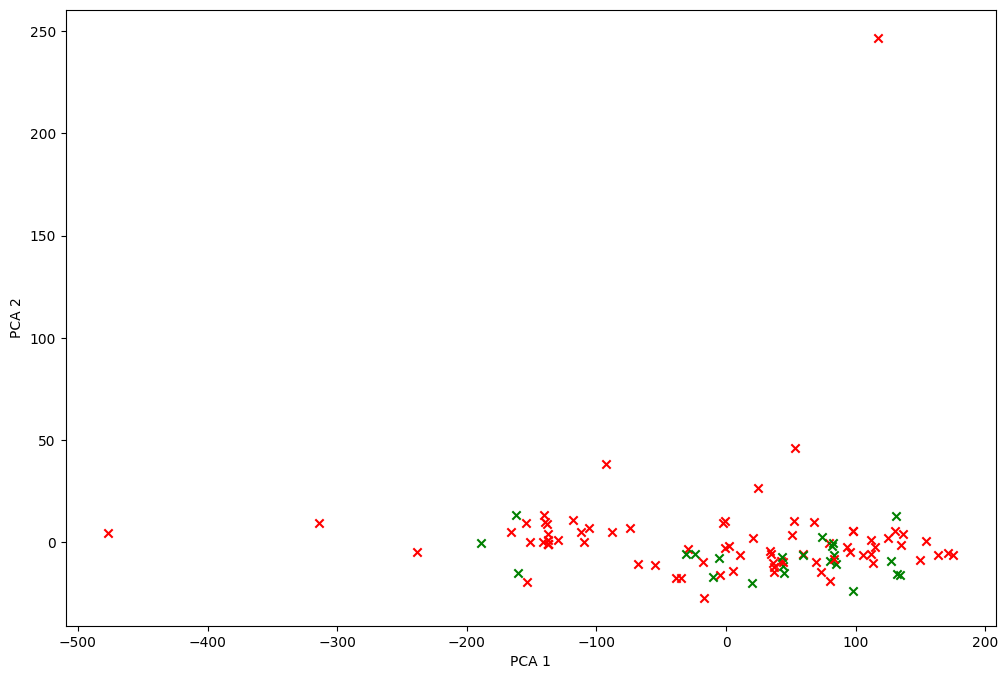

In [200]:
colors = ['r','g']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

for i,pts in enumerate(K_centered @ components):
    ax.scatter(pts[0], pts[1], marker='x', c=colors[train_labels[i]])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show()


In [89]:
from pierre.weisfeiler_lehman import WeisfeilerLehman

In [93]:
kernel_computer = WeisfeilerLehman()
kernel_computer.fit_transform(train_data)

array([[286, 322, 215, ...,  34, 234, 104],
       [322, 678, 328, ...,  40, 384, 145],
       [215, 328, 300, ...,  32, 202, 103],
       ...,
       [ 34,  40,  32, ...,  54,  43,  29],
       [234, 384, 202, ...,  43, 418,  99],
       [104, 145, 103, ...,  29,  99, 160]])